In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("fintech3.csv")

In [3]:
data.shape

(2471, 15)

In [4]:
data.describe()

,Age,Income,Expenses,Investments,Debt,Risk_tolerance,Credit_Score,Family_size,Fin_Cat
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,38.955888,69963.577499,13656.252529,8819.546742,2802.630514,3.203561,736.624848,3.328207,1.239174
std,8.313644,18350.111937,5704.112477,4683.088962,1135.124331,0.738367,37.997716,0.784161,0.753305
min,26.000000,38000.000000,2100.000000,1800.000000,900.000000,2.000000,670.000000,2.000000,0.000000
25%,32.000000,58000.000000,9000.000000,4500.000000,1800.000000,3.000000,715.000000,3.000000,1.000000
50%,38.000000,67000.000000,14000.000000,9500.000000,3000.000000,3.000000,730.000000,4.000000,1.000000
75%,47.000000,89000.000000,18000.000000,12500.000000,3500.000000,4.000000,775.000000,4.000000,2.000000
max,55.000000,100000.000000,25000.000000,17500.000000,5000.000000,4.000000,800.000000,4.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             2471 non-null   int64 
 1   Gender          2471 non-null   object
 2   Income          2471 non-null   int64 
 3   Expenses        2471 non-null   int64 
 4   Investments     2471 non-null   int64 
 5   Debt            2471 non-null   int64 
 6   Risk_tolerance  2471 non-null   int64 
 7   Insurance       2471 non-null   object
 8   Credit_Score    2471 non-null   int64 
 9   Demographic     2471 non-null   object
 10  Family_size     2471 non-null   int64 
 11  Marital_status  2471 non-null   object
 12  Properties      1779 non-null   object
 13  Fin_Cat         2471 non-null   int64 
 14  Emp_status      2471 non-null   object
dtypes: int64(9), object(6)
memory usage: 289.7+ KB


In [6]:
data.head()

,Age,Gender,Income,Expenses,Investments,Debt,Risk_tolerance,Insurance,Credit_Score,Demographic,Family_size,Marital_status,Properties,Fin_Cat,Emp_status
0,35,Male,60000,2100,5000,2000,3,Yes,720,Urban,3,Married,House,1,Entrepreneur
1,45,Female,80000,2700,10000,3000,4,Yes,750,Suburban,4,Married,Apartment,2,Employee
2,28,Male,40000,5000,2000,1000,2,No,680,Rural,2,Single,NaN,0,Self Employed
3,38,Female,70000,12000,8000,2500,3,Yes,740,Urban,3,Married,House,1,Entrepreneur
4,50,Male,90000,20000,12000,4000,4,Yes,760,Suburban,4,Married,Condo,2,Employee


In [7]:
data.Gender.value_counts()

Gender
Male      1244
Female    1227
Name: count, dtype: int64

In [8]:
data.Demographic.value_counts()

Demographic
Suburban    1093
Urban        905
Rural        473
Name: count, dtype: int64

In [9]:
data.Marital_status.value_counts()

Marital_status
Married    1779
Single      692
Name: count, dtype: int64

In [10]:
data.Properties.value_counts()

Properties
House        1013
Condo         640
Apartment     126
Name: count, dtype: int64

In [11]:
data.Fin_Cat.value_counts()

Fin_Cat
2    1067
1     928
0     476
Name: count, dtype: int64

In [12]:
data.Emp_status.value_counts()

Emp_status
Self Employed    1186
Entrepreneur      649
Employee          636
Name: count, dtype: int64

In [13]:
def variables_types(data):
    cat_var = []
    non_cat_var = []
    dis_var = []
    con_var = []

    for column in data.columns:
        if data[column].dtype == "object":
            if data[column].nunique() < 10:
                cat_var.append(column)
            else:
                non_cat_var.append(column)
        elif data[column].dtype in ['int64', 'float64']:
            if data[column].nunique() < 10:
                dis_var.append(column)
            else:
                con_var.append(column)

    return cat_var, non_cat_var, dis_var, con_var

cat, non_cat, dis, con = variables_types(data)

print("Categorical variables:\n", cat)

print("\nNon-categorical variables:\n", non_cat)

print("\nDiscrete variables:\n", dis)

print("\nContinuous variables:\n", con)


Categorical variables:
 ['Gender', 'Insurance', 'Demographic', 'Marital_status', 'Properties', 'Emp_status']

Non-categorical variables:
 []

Discrete variables:
 ['Risk_tolerance', 'Family_size', 'Fin_Cat']

Continuous variables:
 ['Age', 'Income', 'Expenses', 'Investments', 'Debt', 'Credit_Score']


In [14]:
data.describe(exclude='object').columns

Index(['Age', 'Income', 'Expenses', 'Investments', 'Debt', 'Risk_tolerance',
       'Credit_Score', 'Family_size', 'Fin_Cat'],
      dtype='object')

In [15]:
data.describe(include='object').columns

Index(['Gender', 'Insurance', 'Demographic', 'Marital_status', 'Properties',
       'Emp_status'],
      dtype='object')

In [16]:
data['Properties'].fillna(0, inplace=True)

In [17]:
data.head()

,Age,Gender,Income,Expenses,Investments,Debt,Risk_tolerance,Insurance,Credit_Score,Demographic,Family_size,Marital_status,Properties,Fin_Cat,Emp_status
0,35,Male,60000,2100,5000,2000,3,Yes,720,Urban,3,Married,House,1,Entrepreneur
1,45,Female,80000,2700,10000,3000,4,Yes,750,Suburban,4,Married,Apartment,2,Employee
2,28,Male,40000,5000,2000,1000,2,No,680,Rural,2,Single,0,0,Self Employed
3,38,Female,70000,12000,8000,2500,3,Yes,740,Urban,3,Married,House,1,Entrepreneur
4,50,Male,90000,20000,12000,4000,4,Yes,760,Suburban,4,Married,Condo,2,Employee


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender']=data['Gender'].map({'Male':1,'Female':0})
data['Insurance']=data['Insurance'].map({'Yes':1,'No':0})
data['Demographic']=data['Demographic'].map({'Rural':0,'Suburban':1,'Urban':2})
data['Marital_status']=data['Marital_status'].map({'Married':1,'Single':0})
data['Properties']=data['Properties'].map({'Apartment':1,'Condo':2,'House':3})
data['Emp_status']=data['Emp_status'].map({'Self Employed':1,'Employee':2,'Entrepreneur':3})

In [19]:
data.head()

,Age,Gender,Income,Expenses,Investments,Debt,Risk_tolerance,Insurance,Credit_Score,Demographic,Family_size,Marital_status,Properties,Fin_Cat,Emp_status
0,35,1,60000,2100,5000,2000,3,1,720,2,3,1,3.0,1,3
1,45,0,80000,2700,10000,3000,4,1,750,1,4,1,1.0,2,2
2,28,1,40000,5000,2000,1000,2,0,680,0,2,0,NaN,0,1
3,38,0,70000,12000,8000,2500,3,1,740,2,3,1,3.0,1,3
4,50,1,90000,20000,12000,4000,4,1,760,1,4,1,2.0,2,2


In [20]:
data['Properties'].fillna(0, inplace=True)

In [21]:
data.head()

,Age,Gender,Income,Expenses,Investments,Debt,Risk_tolerance,Insurance,Credit_Score,Demographic,Family_size,Marital_status,Properties,Fin_Cat,Emp_status
0,35,1,60000,2100,5000,2000,3,1,720,2,3,1,3.0,1,3
1,45,0,80000,2700,10000,3000,4,1,750,1,4,1,1.0,2,2
2,28,1,40000,5000,2000,1000,2,0,680,0,2,0,0.0,0,1
3,38,0,70000,12000,8000,2500,3,1,740,2,3,1,3.0,1,3
4,50,1,90000,20000,12000,4000,4,1,760,1,4,1,2.0,2,2


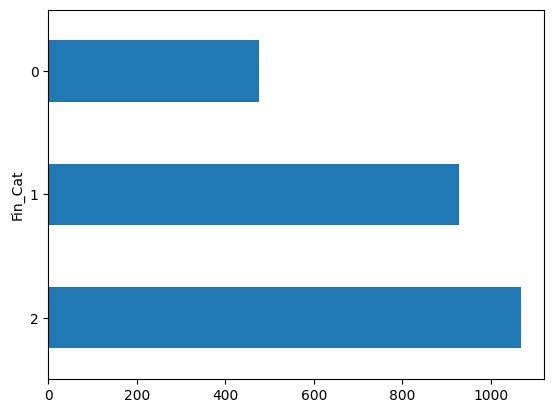

In [22]:
data['Fin_Cat'].value_counts().plot(kind='barh');

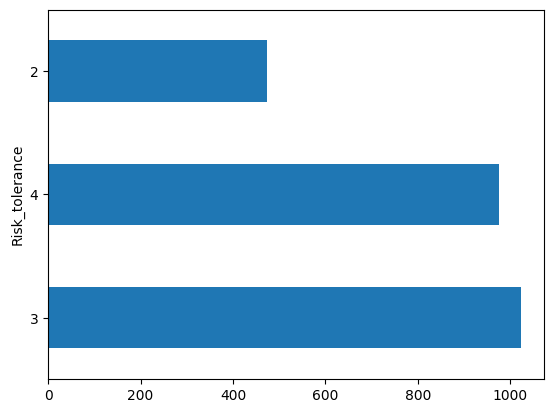

In [23]:
data['Risk_tolerance'].value_counts().plot(kind='barh');

In [24]:
X = data.drop("Fin_Cat", axis=1)
y = data["Fin_Cat"]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
print(X.columns)

Index(['Age', 'Gender', 'Income', 'Expenses', 'Investments', 'Debt',
       'Risk_tolerance', 'Insurance', 'Credit_Score', 'Demographic',
       'Family_size', 'Marital_status', 'Properties', 'Emp_status'],
      dtype='object')


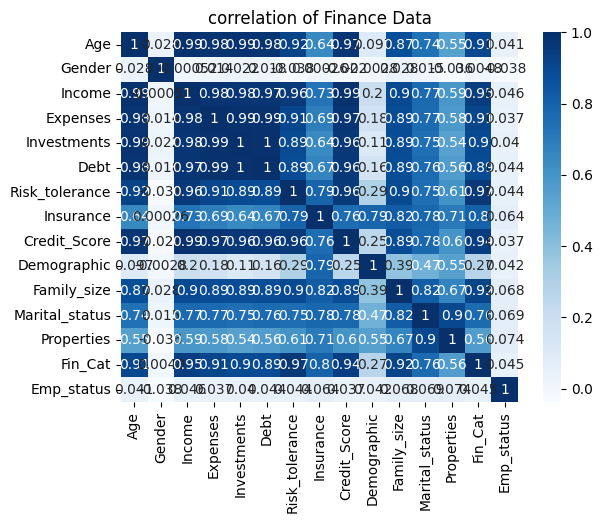

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.title('correlation of Finance Data')
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score
X_test_scaled = scaler.transform(X_test)
y_pred = logreg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 1.0


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [32]:
from sklearn.metrics import accuracy_score
X_test_scaled = scaler.transform(X_test)
y_pred = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred)
print("knn Accuracy:", accuracy_knn)

knn Accuracy: 1.0


In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
y_pred_nb = nb_classifier.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 1.0


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [35]:
from sklearn.metrics import accuracy_score
y_pred_dt = dt_classifier.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 1.0


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 1.0


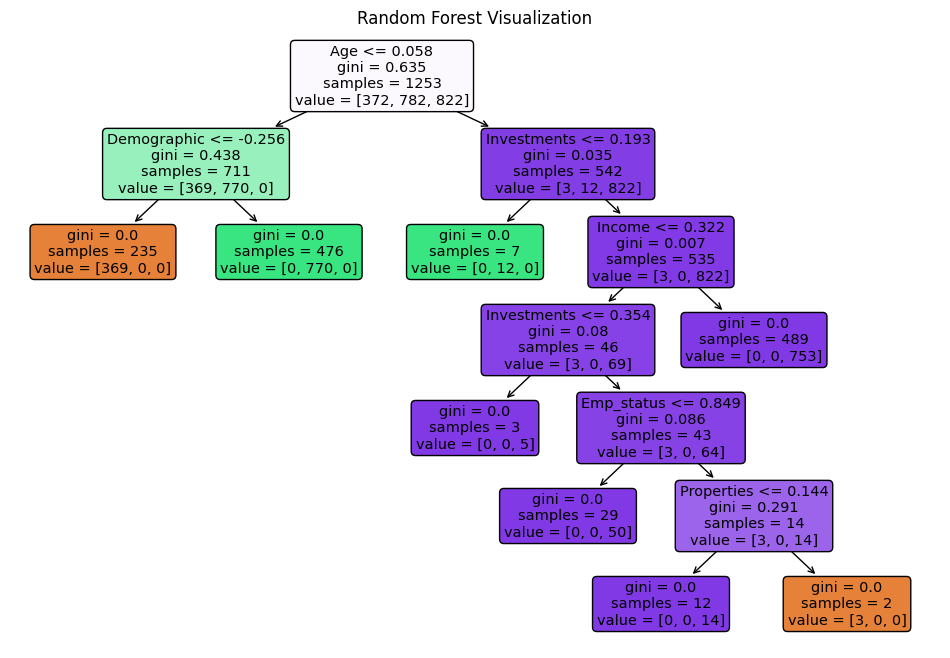

In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, filled=True, rounded=True)
plt.title("Random Forest Visualization")
plt.show()

In [38]:
import numpy as np

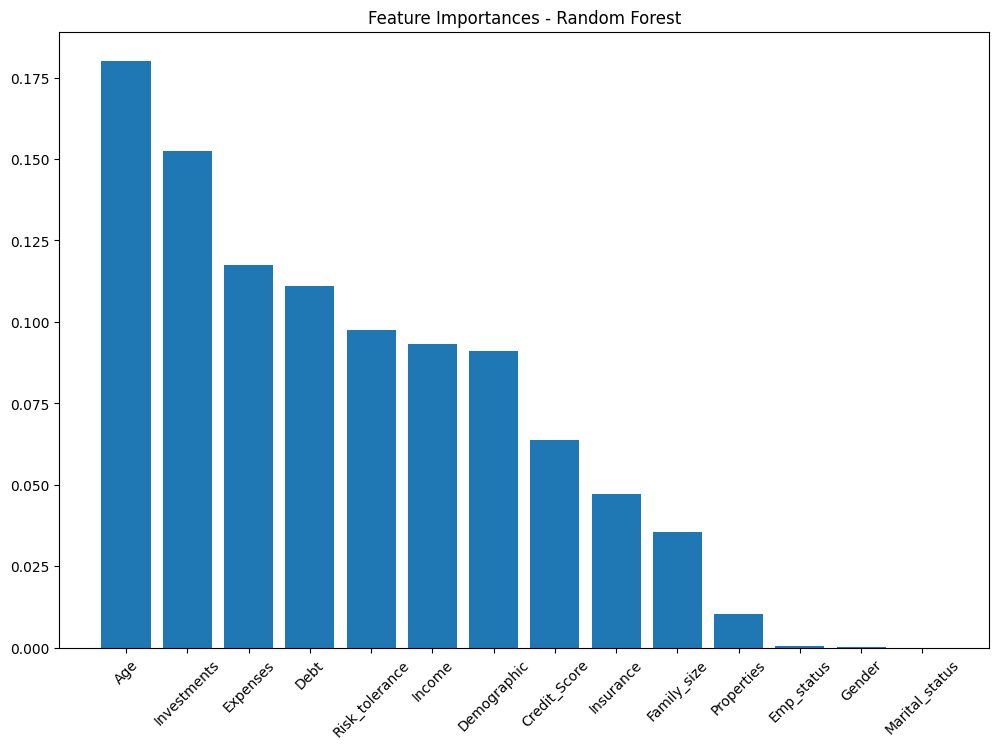

In [39]:
feature_importances = rf_classifier.feature_importances_

feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.title("Feature Importances - Random Forest")
plt.show()

In [40]:
data.tail()

,Age,Gender,Income,Expenses,Investments,Debt,Risk_tolerance,Insurance,Credit_Score,Demographic,Family_size,Marital_status,Properties,Fin_Cat,Emp_status
2466,27,0,42000,5500,2500,1200,2,0,685,0,2,0,0.0,0,2
2467,52,1,97000,22000,16000,4500,4,1,790,1,4,1,2.0,2,1
2468,26,1,38000,4500,1800,900,2,0,670,0,2,0,0.0,0,1
2469,32,1,58000,9000,4500,1800,3,1,715,2,3,0,0.0,1,3
2470,34,0,64000,12000,6500,2400,3,1,730,2,3,1,3.0,1,1


In [41]:
input_data = (38,1,68000,14000,9500,3000,3,1,730,2,4,1,3,2)
input_np_data = np.asarray(input_data)
input_data_reshaped = input_np_data.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)
predicted_outcome = rf_classifier.predict(std_data)
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import LeakyReLU


model = Sequential()
model.add(Dense(units=512, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dense(units=256))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dense(units=128))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(units=64))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(units=1, activation='linear'))


In [43]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
model.fit(X_train_scaled, y_train, batch_size=40, epochs=25)

Epoch 1/25
50/50 [==============================] - 3s 7ms/step - loss: -5.1223 - accuracy: 0.5461
Epoch 2/25
50/50 [==============================] - 0s 7ms/step - loss: -6.5828 - accuracy: 0.5653
Epoch 3/25
50/50 [==============================] - 0s 7ms/step - loss: -6.5828 - accuracy: 0.5653
Epoch 4/25
50/50 [==============================] - 0s 7ms/step - loss: -6.5828 - accuracy: 0.5653
Epoch 5/25
50/50 [==============================] - 0s 7ms/step - loss: -6.5828 - accuracy: 0.5653
Epoch 6/25
50/50 [==============================] - 0s 7ms/step - loss: -6.5828 - accuracy: 0.5653
Epoch 7/25
50/50 [==============================] - 0s 7ms/step - loss: -6.5828 - accuracy: 0.5653
Epoch 8/25
50/50 [==============================] - 0s 7ms/step - loss: -6.5828 - accuracy: 0.5653
Epoch 9/25
50/50 [==============================] - 1s 10ms/step - loss: -6.5828 - accuracy: 0.5653
Epoch 10/25
50/50 [==============================] - 1s 11ms/step - loss: -6.5828 - accuracy: 0.5653
Epoch 1

In [45]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

16/16 [==============================] - 0s 4ms/step - loss: -6.5002 - accuracy: 0.5737
Test Loss: -6.500180244445801
Test Accuracy: 0.573737382888794


In [46]:
input_data = np.array([38,1,68000,14000,9500,3000,3,1,730,2,4,1,3,3])
input_data_scaled = scaler.transform(input_data.reshape(1, -1))
predicted_outcome_ann = model.predict(input_data_scaled)
predicted_outcome_ann_discrete = (predicted_outcome_ann > 0.5).astype(int)  # Apply thresholding
print("Predicted Outcome (ANN):", predicted_outcome_ann_discrete)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 158ms/step
Predicted Outcome (ANN): [[1]]


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=32))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
56/56 [==============================] - 6s 27ms/step - loss: 0.2621 - accuracy: 0.4286 - val_loss: -0.5844 - val_accuracy: 0.4697
Epoch 2/50
56/56 [==============================] - 0s 7ms/step - loss: -1.8990 - accuracy: 0.4708 - val_loss: -2.9604 - val_accuracy: 0.4747
Epoch 3/50
56/56 [==============================] - 0s 7ms/step - loss: -3.6178 - accuracy: 0.4865 - val_loss: -4.1838 - val_accuracy: 0.5758
Epoch 4/50
56/56 [==============================] - 0s 7ms/step - loss: -4.6806 - accuracy: 0.5394 - val_loss: -5.0561 - val_accuracy: 0.5758
Epoch 5/50
56/56 [==============================] - 1s 11ms/step - loss: -5.5129 - accuracy: 0.5472 - val_loss: -5.8137 - val_accuracy: 0.5758
Epoch 6/50
56/56 [==============================] - 1s 9ms/step - loss: -6.2505 - accuracy: 0.5585 - val_loss: -6.5092 - val_accuracy: 0.5758
Epoch 7/50
56/56 [==============================] - 1s 9ms/step - loss: -6.8999 - accuracy: 0.5613 - val_loss: -7.1580 - val_accuracy: 0.5758
Epoch

In [48]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

16/16 [==============================] - 0s 3ms/step - loss: -32.4106 - accuracy: 0.5737
Test Loss: -32.41062927246094
Test Accuracy: 0.573737382888794


In [49]:
input_data = np.array([38,1,68000,14000,9500,3000,3,1,730,2,4,1,3,3]).reshape(1, 1, -1)
input_data_scaled = scaler.transform(input_data.reshape(1, -1))
predicted_outcome_rnn = model.predict(input_data_scaled.reshape(1, 1, -1))
print("Predicted Outcome (RNN):", predicted_outcome_rnn)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 1s/step
Predicted Outcome (RNN): [[1.]]


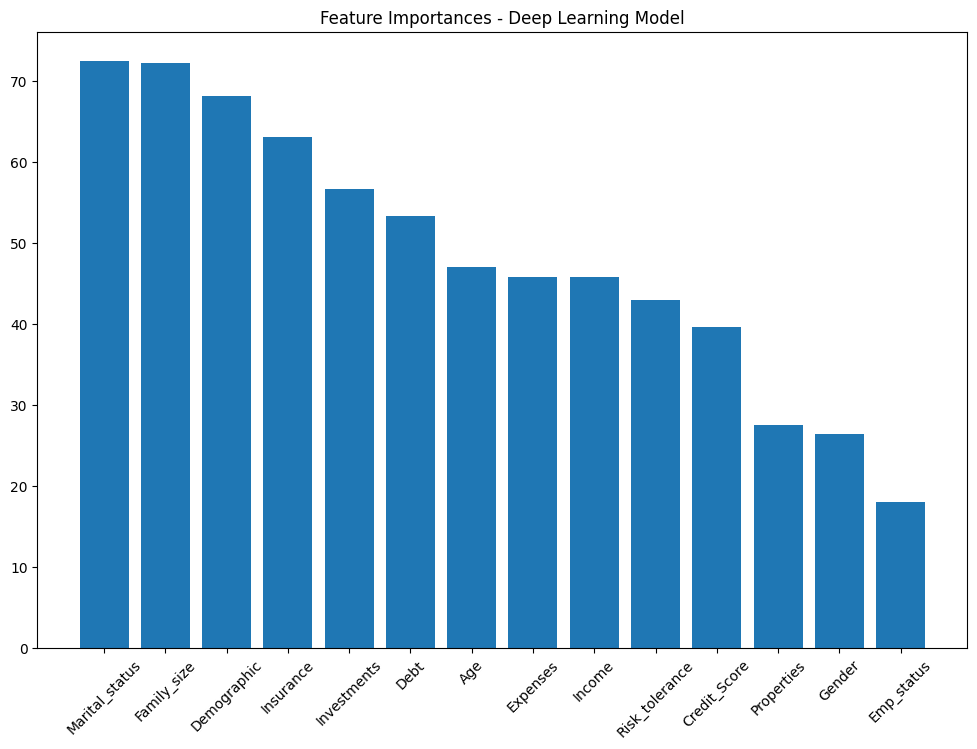

In [50]:
input_weights = model.layers[0].get_weights()[0]

feature_importances_rnn = np.sum(np.abs(input_weights), axis=1)

feature_names_rnn = X.columns

indices_rnn = np.argsort(feature_importances_rnn)[::-1]

plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importances_rnn)), feature_importances_rnn[indices_rnn], align="center")
plt.xticks(range(len(feature_importances_rnn)), feature_names_rnn[indices_rnn], rotation=45)
plt.title("Feature Importances - Deep Learning Model")
plt.show()